# Analyse de l'épidémie de choléra à Londres en 1854

## Contexte historique

En 1854, le quartier de Soho à Londres a vécu [une des pires épidémies de choléra du Royaume-Uni](https://fr.wikipedia.org/wiki/%C3%89pid%C3%A9mie_de_chol%C3%A9ra_de_Broad_Street), avec 616 morts. Cette épidémie est devenue célèbre à cause de l'analyse détaillée de ses causes réalisée par le médecin [John Snow](https://johnsnowsociety.org/). Ce dernier a notamment montré que le choléra est transmis par l'eau plutôt que par l'air, ce qui était la théorie dominante de l'époque.

## Analyse reproductible

### Récupération des données numériques
Tout d'abord récupérons les données numériques mis à notre disposition sur ce [blog](http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/). Nous pouvons retrouver sur ce site deux archives **SnowGIS_SHP.zip** et **SnowGIS_KML.zip** contenant des formats de fichiers différents. Le site mettait aussi à disposition des liens google où les données étaient directement accessible mais malheureusement ces liens ne sont plus fonctionnel. Nous utiliserons donc les données d'une des archives téléchargé et importé afin de garantir la pérénité et l'accessibilité à ces données. 

Nous avons 4 informations à notre disposition dans ces archives : 
- Emplacements des décès dus au choléra (vecteur) avec le nombre de décès à chaque point
- Emplacements des pompes (vecteur)
- La carte originale de John Snow géoréférencée sur la grille nationale de l'Ordnance Survey (raster)
- Cartes actuelles de l'Ordnance Survey de la zone (à partir de celles publiées sous OS OpenData; Contient les données de l'Ordnance Survey © Copyright de la Couronne et droit de la base de données 2013; Raster)

Étant donné que nous utiliserons la bibliothèque [folium](https://python-visualization.github.io/folium/) pour l'affichage de la carte, seules les deux premières nous seront utiles. Si la bibliothèque n'est pas présente dans l'environnement, il faudra l'installer avec la commande `pip install folium`.

La première archive **SnowGIS_SHP** contient des fichiers SHP (Shapefiles) qui sont interpretable par la bibliothèque [geopandas](https://geopandas.org/index.html). Nous ne nous sera pas necessaire d'utiliser l'autre archive avec les fichiers KML.

Nous utiliserons la bibliothèque [geopandas](https://geopandas.org/index.html) pour l'importation des données au format `.shp`. 
Si la bibliothèque geopandas n'est pas présente dans l'environnement, il faudra l'installer avec la commande `pip install geopandas`.

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd
death_cholera_location = gpd.read_file("Cholera_Deaths.shp", crs={"init": "epsg:4326"})
pumps_location = gpd.read_file("Pumps.shp", crs={"init": "epsg:4326"})

### Visualisation et traitement des données
Visualisons les données que nous avons concernant les décès dû au choléra. Comme il était indiqué, nous avons le nombre (*count*) et la localisation (*geometry*) des décès.

In [3]:
death_cholera_location

Id  Count                       geometry
0     0      3  POINT (529308.741 181031.352)
1     0      2  POINT (529312.164 181025.172)
2     0      1  POINT (529314.382 181020.294)
3     0      1  POINT (529317.380 181014.259)
4     0      4  POINT (529320.675 181007.872)
..   ..    ...                            ...
245   0      3  POINT (529362.665 181156.058)
246   0      2  POINT (529365.152 181176.129)
247   0      1  POINT (529274.165 180907.313)
248   0      1  POINT (529299.361 180873.185)
249   0      1  POINT (529324.815 180857.949)

[250 rows x 3 columns]

Vérifions d'abord s'il n'y a pas de données manquantes.

In [4]:
death_cholera_location.isna().any().any()

False

Bonne nouvelle, il n'y pas de données manquantes.

Nous pouvons d'ors et déjà remarquer que les points sont des coordonnées X/Y et non latidude/longitude car les valeurs de celles-ci doivent être comprises entre +90°/-90° et +180°/-180°. Or la bibliothèque **folium** prend en compte ces valeurs pour le positionnement de point. Il sera donc necessaire d'effectuer une conversion. 

In [5]:
death_cholera_location = death_cholera_location.to_crs(epsg=4326) #Conversion au bon format

Regardons si la conversion a bien été faites.

In [6]:
death_cholera_location

Id  Count                   geometry
0     0      3  POINT (-0.13793 51.51342)
1     0      2  POINT (-0.13788 51.51336)
2     0      1  POINT (-0.13785 51.51332)
3     0      1  POINT (-0.13781 51.51326)
4     0      4  POINT (-0.13777 51.51320)
..   ..    ...                        ...
245   0      3  POINT (-0.13711 51.51453)
246   0      2  POINT (-0.13706 51.51471)
247   0      1  POINT (-0.13847 51.51231)
248   0      1  POINT (-0.13812 51.51200)
249   0      1  POINT (-0.13776 51.51186)

[250 rows x 3 columns]

Les coordonnées ressemble déjà plus à ce que l'on recherche. Fesont une vérification rapide sur la carte de la localisation avec les premières coordonnées.

In [7]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [8]:
import folium as fl
m = fl.Map(location=[-0.13793, 51.51342],zoom_start=5)
m

Il semblerait que les coordonnées soient mauvaises. Après vérification sur la documentation de **geopandas**, POINT = (Longitude, Latitude). Et pour folium, nous rentrons `location=[Latitude, Longitude]`. 

Essayons d'inverser les valeurs et revérifions.

In [9]:
m = fl.Map(location=[51.51342, -0.13793],zoom_start=10)
m

Nous sommes bien à Londre, les coordonnées semblent donc être correct.

Maintenant que nous nous sommes assuré de la conformité des données, réitérons la même chose pour la liste des pompes :

In [10]:
pumps_location = pumps_location.to_crs(epsg=4326) #Conversion au bon format
pumps_location

Id                   geometry
0   0  POINT (-0.13667 51.51334)
1   0  POINT (-0.13959 51.51388)
2   0  POINT (-0.13967 51.51491)
3   0  POINT (-0.13163 51.51235)
4   0  POINT (-0.13359 51.51214)
5   0  POINT (-0.13592 51.51154)
6   0  POINT (-0.13396 51.51002)
7   0  POINT (-0.13820 51.51130)

### Représentation des données sur la carte
Essayons maintenant d'afficher des cercles de circonférence proportionnelle au nombre du décès et des symboles pour la localisation des pompes.

Reprenons notre carte précedente avec un zoom plus important.

In [11]:
m = fl.Map(location=[51.51342, -0.13793, ],zoom_start=16.5)

In [12]:
for index, death_row in death_cholera_location.iterrows():
    death_count = death_row['Count']
    point_geometry = death_cholera_location.geometry[index]
    fl.Circle(
    radius=death_count,
    location=[point_geometry.centroid.y,point_geometry.centroid.x], #Ne pas oublier que longitude et latitude sont inversées.
    tooltip=death_count,
    color='crimson',
    fill=True,
    ).add_to(m)
m

Voilà pour la localisation des décès, le radius du cercle correspondant au nombre de décès. 

Ajoutons maintenant les pompes.

In [13]:
for index, pump_row in pumps_location.iterrows():
    point_geometry = pumps_location.geometry[index]
    fl.Marker([point_geometry.centroid.y,point_geometry.centroid.x], popup='<b>Pompes '+str(index)+'</b>').add_to(m) #Ne pas oublier que longitude et latitude sont inversées.
m

Nous pouvons en effet remarquer qu'une pompe se trouve au centre de ces décès et proche d'une zone ayant eu un grand nombre de décès. Il s'agit de la pompe se trouvant dans la rue **Broadwick Street**. Il s'agit de la pompe 0, soit la première de la liste fournit. 

### Une autre approche autour de la pompe de Broadwick Street
#### Nombre de décès suivant la distance des pompes

Enfin de mettre en évidence la pompe de Broadwick Street comme ayant eu un impact dans l'épidémie de choléra, nous pouvons également comparé le nombre de décès autour de chacune des pompes. Pour cela, nous utiliserons la librairie `haversine` pour le calcule de distance entre deux coordonnées.

In [14]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Avec p

In [25]:
 %matplotlib inline
import pandas as pd
import haversine as hs
from haversine import Unit
Broadwick_Pump = pumps_location.iloc[0]
df = pd.DataFrame(columns=['Nb décès', 'Latitude', 'Longitude', 'Distance de la pompe'])
for index, death_row in death_cholera_location.iterrows():
    death_count = death_row['Count']
    point_geometry = death_cholera_location.geometry[index]
    Distance = hs.haversine((point_geometry.centroid.y,point_geometry.centroid.x),(Broadwick_Pump.geometry.centroid.y,Broadwick_Pump.geometry.centroid.x), unit=Unit.METERS)
    df = df.append({'Nb décès': death_count, 'Latitude': point_geometry.centroid.y, 'Longitude': point_geometry.centroid.x, 'Distance de la pompe': Distance}, ignore_index=True)
df_sorted = df.sort_values(by='Distance de la pompe')
df = pd.DataFrame(columns=['Nb décès cumulé', 'Latitude', 'Longitude', 'Distance de la pompe'])
death_count = 0
for index, death_row in df_sorted.iterrows():
    death_count += death_row['Nb décès']
    df = df.append({'Nb décès cumulé': death_count, 'Latitude': death_row['Latitude'], 'Longitude': death_row['Longitude'], 'Distance de la pompe': death_row['Distance de la pompe']}, ignore_index=True)
df

Nb décès cumulé   Latitude  Longitude  Distance de la pompe
0                4.0  51.513300  -0.136705              5.251047
1                7.0  51.513271  -0.136778             10.866257
2                8.0  51.513429  -0.136764             11.852628
3               12.0  51.513458  -0.136675             13.030076
4               15.0  51.513404  -0.136877             16.082748
..               ...        ...        ...                   ...
245            484.0  51.514594  -0.133563            256.031164
246            485.0  51.513258  -0.132933            258.585684
247            487.0  51.514581  -0.133467            260.935078
248            488.0  51.514606  -0.133393            266.696537
249            489.0  51.515834  -0.134474            316.088437

[250 rows x 4 columns]

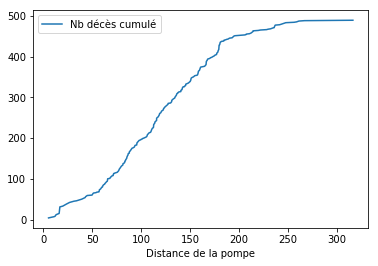

In [27]:
df.plot(x='Distance de la pompe', y='Nb décès cumulé')

In [19]:
max_dist = 300
df_pump_death = pd.DataFrame(columns=['Pompe Index', 'Latitude', 'Longitude', 'Nombre de décès dans un rayon de 300m'])
for index_pump, pump_row in pumps_location.iterrows():
    death_count = 0
    pump_point_geometry = pumps_location.geometry[index_pump]
    for index, death_row in death_cholera_location.iterrows():
        death_point_geometry = death_cholera_location.geometry[index]
        Distance = hs.haversine((death_point_geometry.centroid.y,death_point_geometry.centroid.x),(pump_point_geometry.centroid.y,pump_point_geometry.centroid.x), unit=Unit.METERS)
        if Distance < max_dist:
            death_count += death_row['Count']
    
    df_pump_death = df_pump_death.append({'Pompe Index': index_pump, 'Latitude': pump_point_geometry.centroid.y, 'Longitude': pump_point_geometry.centroid.x, 'Nombre de décès dans un rayon de 300m': death_count}, ignore_index=True)
df_pump_death

Pompe Index   Latitude  Longitude  Nombre de décès dans un rayon de 300m
0          0.0  51.513341  -0.136668                                  488.0
1          1.0  51.513876  -0.139586                                  346.0
2          2.0  51.514906  -0.139671                                  263.0
3          3.0  51.512354  -0.131630                                  139.0
4          4.0  51.512139  -0.133594                                  334.0
5          5.0  51.511542  -0.135919                                  392.0
6          6.0  51.510019  -0.133962                                   42.0
7          7.0  51.511295  -0.138199                                  300.0

In [29]:
m = fl.Map(location=[51.51342, -0.13793, ],zoom_start=16.5)
for index, pump_row in df_pump_death.iterrows():
    fl.Circle(
    radius=300,
    location=[df_pump_death['Longitude'],df_pump_death['Latitude']], #Ne pas oublier que longitude et latitude sont inversées.
    tooltip=df_pump_death['Nombre de décès dans un rayon de 300m'],
    color='crimson',
    fill=True,
    ).add_to(m)
    fl.Marker([df_pump_death['Latitude'],df_pump_death['Longitude']], popup='<b>Pompes '+str(index)+'</b>').add_to(m) #Ne pas oublier que longitude et latitude sont inversées.
m

ValueError: Location should consist of two numerical values, but 0   -0.136668
1   -0.139586
2   -0.139671
3   -0.131630
4   -0.133594
5   -0.135919
6   -0.133962
7   -0.138199
Name: Longitude, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [ ]:
from folium.plugins import HeatMap
m = fl.Map(location=[51.51334, -0.13667],zoom_start=16.5)
HeatMap(data=df_pump_death[['Latitude', 'Longitude', 'Nombre de décès dans un rayon de 300m']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=13).add_to(m)
fl.Marker([51.51334,-0.13667], popup='<b>Pompes de </b>').add_to(m) #Ne pas oublier que longitude et latitude sont inversées.
m